## Modelo Supervisado - Regresión
#### Universidad Tecnológica Nacional - Reg. Buenos Aires
#### Ingeniería Industrial - Ciencia de Datos (clusterAI)

#### Noviembre, 2022
<br>




In [1]:
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab: 
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)

True
Mounted at /content/gdrive


In [2]:
 if var_google_colab:
 # Direccion root donde está la jupyter-notebook
  root_path = "/content/gdrive/MyDrive/UTN/ciencia de datos/"


###Librerias

In [3]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [4]:
#Sklearn Tools
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier



###Dataset

In [5]:
# importo el dataset 
properati= pd.read_csv(root_path+'NewDataSet.csv')
#Vemos que se haya importado correctamente
properati.head()

,Unnamed: 0,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,Departamento,PH,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,2,-34.590569,-58.425215,3.0,2.0,98.0,68.0,360000.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,-34.577440,-58.485041,4.0,1.0,118.0,96.0,285000.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4,-34.615851,-58.439566,2.0,1.0,61.0,52.0,145000.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,-34.606540,-58.497938,3.0,1.0,66.0,58.0,153000.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,6,-34.578578,-58.428276,3.0,1.0,78.0,75.0,200000.0,1,0,...,0,0,0,0,0,0,0,0,0,0


###  Modelo

In [6]:
#etiqueta Y con el precio
y =np.array(properati[["price"]])
y.shape

(16340, 1)

In [7]:
#verifico que el dataset no cuenta con valores nulos
properati.isnull().sum()

Unnamed: 0          0
lat                 0
lon                 0
rooms               0
bathrooms           0
                   ..
Villa Riachuelo     0
Villa Santa Rita    0
Villa Soldati       0
Villa Urquiza       0
Villa del Parque    0
Length: 66, dtype: int64

In [8]:
#muestro los nombres de las columnas
properati.columns

Index(['Unnamed: 0', 'lat', 'lon', 'rooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'Departamento', 'PH', 'Abasto', 'Agronomía',
       'Almagro', 'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca',
       'Boedo', 'Caballito', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Parque Avellaneda', 'Parque Centenario',
       'Parque Chacabuco', 'Parque Chas', 'Parque Patricios', 'Paternal',
       'Pompeya', 'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
       'San Cristobal', 'San Nicolás', 'San Telmo', 'Tribunales',
       'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto',
       'Villa General Mitre', 'Villa Lugano', 'Villa Luro', 'Villa Ortuzar',
       'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa

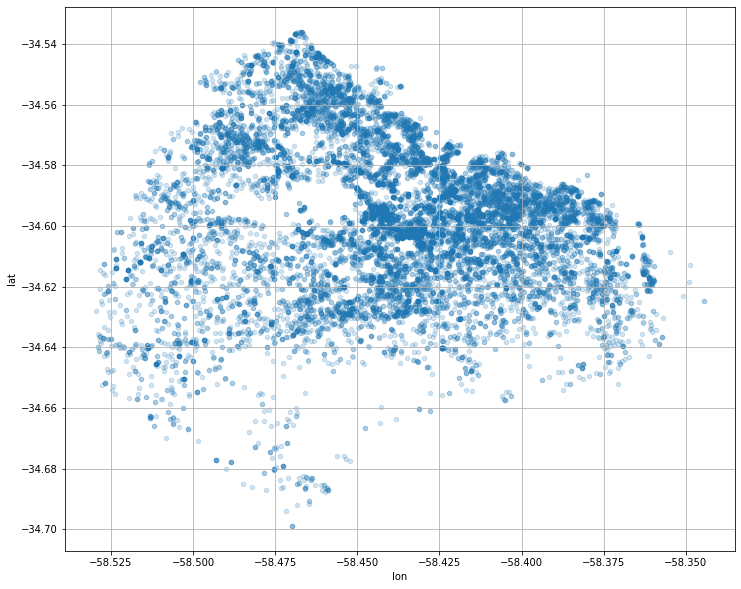

In [9]:
#se puede observar la cantidad de propiedades a la venta segun su latitud y longitud
properati.plot(kind="scatter",x="lon",y="lat",grid=True,alpha=0.2,  figsize=(12,10))

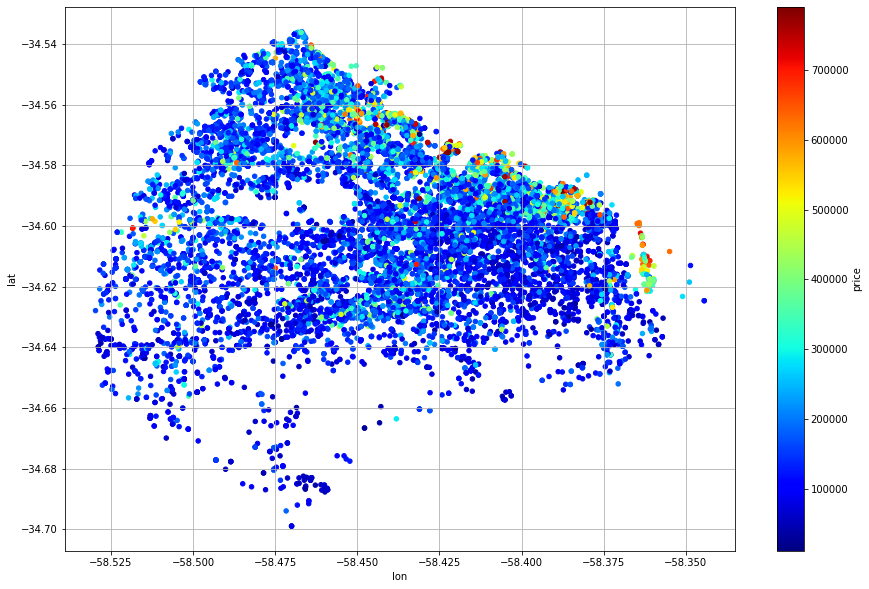

In [10]:
# puedo observar la ubicacion de las propiedades y su precio
properati.plot(kind="scatter", x="lon", y="lat", grid=True,
         c="price", cmap="jet", colorbar=True,
       legend=True, sharex=False, figsize=(15, 10))

In [11]:
#elimimno columnas
x = properati.drop(['Unnamed: 0','price'], axis=1) #agregar precio

In [12]:
x.shape

(16340, 64)

In [13]:
#muestro el tipo de dato de las columnas
x.dtypes

lat                 float64
lon                 float64
rooms               float64
bathrooms           float64
surface_total       float64
                     ...   
Villa Riachuelo       int64
Villa Santa Rita      int64
Villa Soldati         int64
Villa Urquiza         int64
Villa del Parque      int64
Length: 64, dtype: object

In [14]:
#muestro X
x.describe()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,Departamento,PH,Abasto,Agronomía,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
count,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,...,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000,16340.000000
mean,-34.597264,-58.439177,2.822889,1.355202,130.934272,98.761873,0.875153,0.124847,0.002815,0.002142,...,0.006242,0.008568,0.008384,0.009119,0.001224,0.000306,0.004896,0.000734,0.049327,0.019217
std,0.024801,0.035830,1.148325,0.623431,1812.234121,1071.224463,0.330555,0.330555,0.052985,0.046233,...,0.078764,0.092169,0.091184,0.095059,0.034965,0.017491,0.069802,0.027091,0.216556,0.137290
min,-34.698989,-58.529677,1.000000,1.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-34.613845,-58.463763,2.000000,1.000000,48.000000,43.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-34.597760,-58.438511,3.000000,1.000000,66.000000,58.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-34.580523,-58.413718,3.000000,2.000000,97.000000,82.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-34.536002,-58.344378,19.000000,7.000000,140380.000000,63660.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####Train and test

In [15]:
#declaro las nuevas variables de Test y Train
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)


In [16]:
# observamos como queda la matriz de xtrain
xtrain.shape

(11438, 64)

In [17]:
# observamos como queda la matriz de xtest
xtest.shape

(4902, 64)

In [18]:

ytrain.shape

(11438, 1)

In [19]:
ytest.shape

(4902, 1)

####Scaler

In [20]:
# auto scaling train- set (mean = 0, std = 1)
# ver que en la misma linea creamos el standard scaler y lo "fiteamos" al mismo tiempo con "xtrain"
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler


StandardScaler()

In [21]:
# xtrain_scal tendra el dataset de train pre-procesado con el standard scaler
xtrain_scal = scaler.transform(xtrain)  
# para cada feature imprimimos la media y el desvio standard obtenido. Ver que media = 0 y stdev = 1.
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))



[ 1.55352795e-14  8.67951744e-14 -2.79545577e-17 -3.23030445e-17
  0.00000000e+00  2.48484957e-18 -7.29924562e-17 -2.32954648e-18
 -3.63409250e-17 -3.91363808e-17  4.19318366e-17 -8.69697351e-18
  2.82651639e-17  1.98787966e-17  4.47272923e-17 -3.10606197e-18
 -2.79545577e-18  5.90151774e-18 -4.47272923e-17  2.48484957e-17
  1.49090974e-17 -6.21212394e-19 -1.92575842e-17  1.24242479e-17
  2.05000090e-17  3.26136507e-17 -4.96969915e-18 -1.84810687e-17
  2.36060710e-17  2.48484957e-17  2.48484957e-17  7.08182129e-17
  3.72727436e-18  4.96969915e-18  4.34848675e-18  3.10606197e-18
  3.85151684e-17 -3.10606197e-18 -1.98787966e-17  1.86363718e-18
 -2.48484957e-18 -2.48484957e-18 -8.07576112e-18 -6.33636641e-17
 -8.07576112e-18 -1.98787966e-17  1.24242479e-18 -7.08182129e-17
  1.24242479e-17 -2.20530400e-17 -5.12500225e-17  1.42878851e-17
  4.25530490e-17 -1.92575842e-17  5.15606287e-17  4.84545667e-17
 -4.22424428e-17  4.96969915e-18  2.17424338e-18 -1.24242479e-17
  2.54697081e-17 -4.65909

In [22]:
# observamos en que type quedo xtrain_xcal
type(xtrain_scal)

numpy.ndarray

In [23]:
# utilizando el scaler "fiteado" o "ajustado" a los datos de train, aplicamos el scaler a los datos de test.
# obtenemos "xtest_scal" 
xtest_scal = scaler.transform(xtest)  
# obviamente la media y stdev de las features en test no seran 0 y 1 ya que el scaler se ajusto con train unicamente.
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))



[-0.02487687  0.00750617  0.00973307  0.03511619 -0.01699698 -0.02269962
 -0.00707024  0.00707024 -0.01977063 -0.01501326 -0.00275508  0.02739039
 -0.00314611 -0.00469268  0.02589046 -0.00249967 -0.00851141 -0.00403659
 -0.00660583 -0.0100629   0.02347028 -0.02276701 -0.01794898 -0.0134809
  0.02821937 -0.02622815  0.02194341  0.02749632 -0.00940877 -0.0055408
  0.00389525 -0.01246988  0.01743084 -0.0096362   0.03704255  0.02414322
  0.01457599  0.00487631 -0.01866392 -0.02433114  0.02034203  0.02536764
 -0.00298632 -0.01277395 -0.0004709  -0.00649018  0.00539021  0.0351944
 -0.00470096 -0.02059315 -0.01937279 -0.000115    0.0147236  -0.0017377
  0.02481216  0.0031781   0.01946031 -0.00213899  0.00864926  0.0089985
 -0.03125519 -0.01577661 -0.045525    0.02349951]
[1.01137705 1.00732876 1.01305353 1.01374904 0.25061298 0.21727144
 1.00800173 1.00800173 0.80552355 0.83178297 0.99531043 1.07962366
 0.98316532 0.98484742 1.04109373 0.97847071 0.96131836 0.99405064
 0.9297716  0.94118924 1

In [24]:
#los titulos del cuadro de resultado
results = pd.DataFrame(columns=['Model','R2','MSE','MAE'])

#### Support Vector Regression

In [25]:
#inicio mi modelo de SVR
n_folds=10
est = SVR(max_iter=3000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [ 500, 2000,50000,80000,90000],
              'gamma':[10,100,500,1000],
              "kernel":["rbf", "gauss"]}
#GridS
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [26]:
gs.fit(xtrain_scal, ytrain.ravel()) 

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", lin

GridSearchCV(cv=10, estimator=SVR(max_iter=3000), n_jobs=3,
             param_grid={'C': [500, 2000, 50000, 80000, 90000],
                         'gamma': [10, 100, 500, 1000],
                         'kernel': ['rbf', 'gauss']},
             scoring='neg_mean_squared_error', verbose=3)

In [27]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=90000, gamma=10, max_iter=3000) 

{'C': 90000, 'gamma': 10, 'kernel': 'rbf'} 

-5738646722.709913 



In [28]:
svr_prediction = gs.best_estimator_.predict(xtest_scal)
svr_r2 = r2_score(y_true=ytest, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=ytest, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=ytest, y_pred=svr_prediction)

R2 score: 0.611596
MSE: 5690335238.374037
MAE: 47084.580814


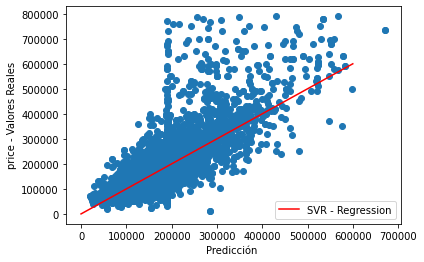

In [29]:
#graficamos la prediccion y el Ytest
pl.scatter(svr_prediction, ytest)
pl.plot(np.arange(0,600000),np.arange(0,600000), 'r', label='SVR - Regression')
pl.xlabel('Predicción ')
pl.ylabel('price - Valores Reales')
pl.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MSE: {svr_mse:.6f}')
print(f'MAE: {svr_mae:.6f}')

In [30]:
results = results.append({'Model':'SVR',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

In [31]:
results

,Model,R2,MSE,MAE
0,SVR,0.611596,5.690335e+09,47084.580814


#### KNN Regression

In [32]:
#iniciamos el modelo KNN regression y sus hiperparametros
n_folds = 10
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
k_params = np.arange(0,100,2)
knn_params = [{'n_neighbors': k_params}]

gs = GridSearchCV(knn, param_grid=knn_params,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=1, n_jobs=1)

In [33]:
gs.fit(xtrain_scal, ytrain)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 213, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueError: Expected 

GridSearchCV(cv=10,
             estimator=KNeighborsRegressor(n_neighbors=3, weights='distance'),
             n_jobs=1,
             param_grid=[{'n_neighbors': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}],
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

KNeighborsRegressor(n_neighbors=22, weights='distance') 

{'n_neighbors': 22} 

-2562030599.5877366 



In [35]:
knn_prediction = gs.best_estimator_.predict(xtest_scal)
knn_r2 = r2_score(y_true=ytest, y_pred=knn_prediction)
knn_mse = mean_squared_error(y_true=ytest, y_pred=knn_prediction)
knn_mae = mean_absolute_error(y_true=ytest, y_pred=knn_prediction)

R2 score: 0.836001
MAE: 24786.633604
MSE: 2402670606.247765


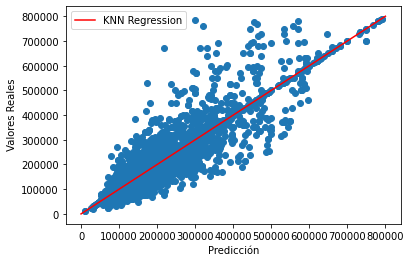

In [36]:
#graficamos
pl.scatter(knn_prediction, ytest)
pl.plot(np.arange(0,800000),np.arange(0,800000), 'r', label='KNN Regression')
pl.xlabel('Predicción')
pl.ylabel(' Valores Reales')
pl.legend()
print(f'R2 score: {knn_r2:.6f}')
print(f'MAE: {knn_mae:.6f}')
print(f'MSE: {knn_mse:.6f}')

In [37]:
results = results.append({'Model':'KNN',
                                'R2':knn_r2,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)

In [38]:
#muestro la tabla de resultados parciales
results

,Model,R2,MSE,MAE
0,SVR,0.611596,5.690335e+09,47084.580814
1,KNN,0.836001,2.402671e+09,24786.633604


#### RandomForest Regressor

In [39]:
#inicio mi modelo
rf= RandomForestRegressor()

In [40]:
#lista de parametros a utilizar
param_trees = {'n_estimators': [50, 200,500,1000], 
               'max_features': [0.5, 'sqrt','log2'],  
               'min_samples_leaf':[1, 5]}

In [41]:
#GridSearch
regressor_rf = GridSearchCV(rf, param_grid = param_trees, refit = True, cv = 3)
regressor_rf.fit(xtrain_scal, ytrain.ravel())

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.5, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'n_estimators': [50, 200, 500, 1000]})

In [42]:
#Imprimo resultado
print(regressor_rf.best_estimator_, "\n")
print(regressor_rf.best_params_, "\n")
print(regressor_rf.best_score_, "\n")

RandomForestRegressor(max_features='log2', n_estimators=1000) 

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 1000} 

0.8797776326963462 



In [43]:

rf_prediction = regressor_rf.best_estimator_.predict(xtest_scal)
#metodos de performance
rf_r2 = r2_score(y_true=ytest, y_pred=rf_prediction)
rf_mse = mean_squared_error(y_true=ytest, y_pred=rf_prediction)
rf_mae = mean_absolute_error(y_true=ytest, y_pred=rf_prediction)

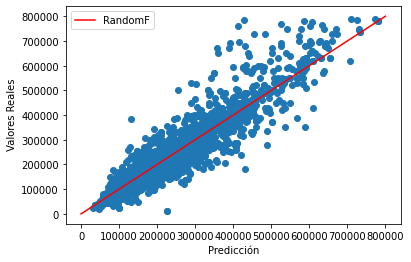

In [44]:
#grafico de mi Ytest y la prediccion
pl.scatter(rf_prediction, ytest)
pl.plot(np.arange(0,800000),np.arange(0,800000), 'r', label='RandomF')
pl.xlabel('Predicción')
pl.ylabel(' Valores Reales')
pl.legend()


In [45]:
#completo la tabla de resultado.
results = results.append({'Model':'RandomForest R',
                                'R2':rf_r2,
                                'MSE':rf_mse,
                                'MAE':rf_mae},ignore_index=True)

###Resultados Finales

Los modelos de KNN y Random Forest Regression presentaron un rendimiento aceptable, alcanzando una precisión de más del 83%. El modelo Support Vector Regression no presentó resultados aceptables hasta el momento. Empleando estos modelos, podría predecir con una considerable precisión el precio de una propiedad en la ciudad de Buenos Aires.

In [46]:
#muestro en pantalla la tabla fnal de resultado, se puede observar que randomForest es el modelo mas acertado.
results

,Model,R2,MSE,MAE
0,SVR,0.611596,5.690335e+09,47084.580814
1,KNN,0.836001,2.402671e+09,24786.633604
2,RandomForest R,0.900549,1.457008e+09,21745.820024


Aclaracion: en este notebook no utilizamos reduccion de la dimensionalidad. En el notebook clusterai_tomas_dinatale_machine_learning1.ipynb utilizamos Kpca, pero los resultados obtenidos no fueron aceptables.